In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from keras import layers
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#IMPORTING THE DATASET

data = pd.read_csv('creditcard.csv')

<AxesSubplot:xlabel='Class', ylabel='count'>

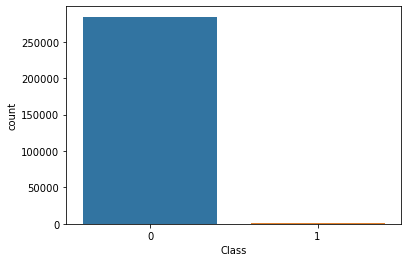

In [3]:
#SPLITTING THE DATASET

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sns.countplot(x='Class',data=data)

In [4]:
#FEATURE SCALLING

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))


In [5]:
#RESHAPE DATA FOR CNN

X_train_cnn = (X_train - X_train.mean()) / X_train.std()
X_test_cnn = (X_test - X_train.mean()) / X_train.std()

X_train_cnn = X_train_cnn.values.reshape(-1, 30, 1)
X_test_cnn = X_test_cnn.values.reshape(-1, 30, 1)

In [6]:
#MODEL WITH 20 LAYERS 

model_20 = keras.Sequential([
    keras.layers.Conv1D(filters=32,kernel_size=2,activation="relu",input_shape=(X_train_cnn.shape[1],1)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv1D(filters=64,kernel_size=2,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Conv1D(filters=64,kernel_size=2,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),

    keras.layers.Conv1D(filters=64,kernel_size=2,activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.5), 

    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(25,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])

In [7]:
#COMPILING AND FITTING 

model_20.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_20 = model_20.fit(X_train_cnn, Y_train, epochs=100, validation_split=0.2, batch_size=64)

Epoch 1/100
2849/2849 [==============================] - 47s 16ms/step - loss: 0.0102 - accuracy: 0.9978 - val_loss: 0.0047 - val_accuracy: 0.9995
Epoch 2/100
2849/2849 [==============================] - 46s 16ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 3/100
2849/2849 [==============================] - 47s 17ms/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 4/100
2849/2849 [==============================] - 46s 16ms/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 5/100
2849/2849 [==============================] - 48s 17ms/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 6/100
2849/2849 [==============================] - 44s 15ms/step - loss: 0.0048 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 7/100
2849/2849 [==============================] - 44s 15ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0

In [8]:
#EXTRACTING TRAINING SET FEATURES

cnn_features = model_20.predict(X_train_cnn)

7121/7121 [==============================] - 14s 2ms/step


In [9]:
#TRAINING SVM MODEL USING CNN
svm_model = SVC(kernel = 'linear', random_state = 0)
svm_model.fit(cnn_features, Y_train)

SVC(kernel='linear', random_state=0)

In [14]:
#EXTRACT TEST SET FEATURES

cnn_features_test = model_20.predict(X_test_cnn)

1781/1781 [==============================] - 3s 2ms/step


In [15]:
#PREDICT USING SVM MODEL

svm_pred = svm_model.predict(cnn_features_test)

In [16]:
# PRINT CLASSIFICATION REPORT AND CONFUSION MATRIX
print(classification_report(Y_test, svm_pred))
print(confusion_matrix(Y_test, svm_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.86      0.79      0.82       101

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[56848    13]
 [   21    80]]


In [19]:
#PRINT ACCURACY OF THE CNN-SVM TRANSFER LEARNING MODEL

acc_sc = accuracy_score(Y_test, y_pred=svm_pred)
print("The accuracy of the CNN-SVM Transfer Learning Model is",acc_sc*100,"%")

The accuracy of the CNN-SVM Transfer Learning Model is 99.9403110845827 %
